In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
import os
print(os.getcwd())

/home/srp/research/Fairness/fairness_AL/codes


In [3]:
device = torch.device('cuda:0')

In [4]:
from utils.test_utils import obtain_AL_ckpts, split_AL_loaders
from utils.test_utils import load_AL_config, load_AL_dataloader, load_test_model

In [5]:
save_dir = '../results/simulation/220316_0010'
config_file, state_list, data_files, arg_file = obtain_AL_ckpts(save_dir)

In [6]:
print(state_list, data_files)

['binaryNN_0.pt', 'binaryNN_1.pt', 'binaryNN_10.pt', 'binaryNN_11.pt', 'binaryNN_12.pt', 'binaryNN_13.pt', 'binaryNN_14.pt', 'binaryNN_15.pt', 'binaryNN_16.pt', 'binaryNN_17.pt', 'binaryNN_18.pt', 'binaryNN_19.pt', 'binaryNN_2.pt', 'binaryNN_20.pt', 'binaryNN_21.pt', 'binaryNN_22.pt', 'binaryNN_23.pt', 'binaryNN_24.pt', 'binaryNN_25.pt', 'binaryNN_26.pt', 'binaryNN_27.pt', 'binaryNN_3.pt', 'binaryNN_4.pt', 'binaryNN_5.pt', 'binaryNN_6.pt', 'binaryNN_7.pt', 'binaryNN_8.pt', 'binaryNN_9.pt'] ['final_dataloader.pkl', 'test_loader.pkl', 'selected_group_results.pkl']


### load models and train data loaders

In [7]:
args = load_AL_config(save_dir, config_file)
dl_loader = load_AL_dataloader(args.save_dir,'final_dataloader.pkl')
test_loader = load_AL_dataloader(args.save_dir,'test_loader.pkl')

In [8]:
dl_loaders,dl_cum_loaders = split_AL_loaders(dl_loader, args)

/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)


In [9]:
import pickle, os
with open(os.path.join(args.save_dir, 'selected_group_results.pkl'),'rb') as f:
    gids = pickle.load(f)

In [10]:
from utils.test_utils import test_groupwise, test_model

In [11]:
from sklearn.linear_model import LogisticRegression as LogR

In [12]:
for it in range(len(state_list)):
    st = args.problem_type+args.model_type +"_"+ str(it)+ ".pt"
    print("="*50)
    clf,clf_criterion = load_test_model(save_dir, st, args)
    _, acc = test_model(clf, dl_cum_loaders[it],clf_criterion, device, args.problem_type)
    _, acc2 = test_model(clf, test_loader,clf_criterion, device, args.problem_type)
    lrclf = LogR().fit(dl_cum_loaders[it].dataset.tensors[0].numpy(),dl_cum_loaders[it].dataset.tensors[1].numpy())
    acc3 = lrclf.score(dl_cum_loaders[it].dataset.tensors[0].numpy(),dl_cum_loaders[it].dataset.tensors[1].numpy())
    acc4 = lrclf.score(test_loader.dataset.tensors[0].numpy(),test_loader.dataset.tensors[1].numpy())
    print("cumulated total training/test acc:", acc,"/",acc2,"/",acc3*100,"/",acc4*100)
    test_groupwise(clf, dl_cum_loaders[it],clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
    print("test set performance")
    test_groupwise(clf, test_loader,clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
    print("selected group is", gids[it])
    print('-'*50)
    for i in range(it+1):
        _, acc = test_model(clf, dl_loaders[i],clf_criterion, device, args.problem_type)
        print("data loader",i, "acc:",acc)
        test_groupwise(clf, dl_loaders[i],clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
        print("")

loaded model is binaryNN_0.pt


/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)
/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/ut

cumulated total training/test acc: tensor(61.) / tensor(52.4941) / 97.0 / 68.88361045130641
0.0 : loss 0.6911731958389282 / acc 55.71428680419922
1.0 : loss 0.6845404505729675 / acc 73.33332824707031
test set performance
0.0 : loss 0.6939986944198608 / acc 48.20846939086914
1.0 : loss 0.6880407333374023 / acc 64.03508758544922
selected group is 0.0
--------------------------------------------------
data loader 0 acc: tensor(61.)
0.0 : loss 0.6911731958389282 / acc 55.71428680419922
1.0 : loss 0.6845404505729675 / acc 73.33332824707031

loaded model is binaryNN_1.pt
cumulated total training/test acc: tensor(57.5758) / tensor(52.4941) / 96.21212121212122 / 69.12114014251782
0.0 : loss 0.6914273500442505 / acc 53.260868072509766
1.0 : loss 0.6809794902801514 / acc 67.5
test set performance
0.0 : loss 0.6951345205307007 / acc 48.20846939086914
1.0 : loss 0.6835218071937561 / acc 64.03508758544922
selected group is 0.0
--------------------------------------------------
data loader 0 acc: te

/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)
/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srp/research/Fairness/fairness_AL/codes/ut

selected group is 0.0
--------------------------------------------------
data loader 0 acc: tensor(61.)
0.0 : loss 0.6930140256881714 / acc 55.71428680419922
1.0 : loss 0.6926015615463257 / acc 73.33332824707031

data loader 1 acc: tensor(46.8750)
0.0 : loss 0.6932543516159058 / acc 45.45454406738281
1.0 : loss 0.6931478977203369 / acc 50.0

data loader 2 acc: tensor(46.8750)
0.0 : loss 0.6933608055114746 / acc 40.90909194946289
1.0 : loss 0.6929137110710144 / acc 60.0

data loader 3 acc: tensor(50.)
0.0 : loss 0.6934024691581726 / acc 39.13043212890625
1.0 : loss 0.6924974322319031 / acc 77.77777099609375

loaded model is binaryNN_4.pt
cumulated total training/test acc: tensor(53.9474) / tensor(52.4941) / 94.2982456140351 / 78.14726840855107
0.0 : loss 0.6940863728523254 / acc 47.2049674987793
1.0 : loss 0.6872801184654236 / acc 70.14925384521484
test set performance
0.0 : loss 0.6937885880470276 / acc 48.20846939086914
1.0 : loss 0.6890938878059387 / acc 64.03508758544922
selected gr

/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)
/home/srp/.pyenv/versions/pytorch15/lib/python3.

cumulated total training/test acc: tensor(56.1644) / tensor(52.4941) / 93.15068493150685 / 78.14726840855107
0.0 : loss 0.6934051513671875 / acc 50.239234924316406
1.0 : loss 0.6817314624786377 / acc 71.08433532714844
test set performance
0.0 : loss 0.694542407989502 / acc 48.20846939086914
1.0 : loss 0.6856791973114014 / acc 64.03508758544922
selected group is 0.0
--------------------------------------------------
data loader 0 acc: tensor(61.)
0.0 : loss 0.6903390884399414 / acc 55.71428680419922
1.0 : loss 0.6804720163345337 / acc 73.33332824707031

data loader 1 acc: tensor(46.8750)
0.0 : loss 0.69608473777771 / acc 45.45454406738281
1.0 : loss 0.6935391426086426 / acc 50.0

data loader 2 acc: tensor(46.8750)
0.0 : loss 0.6986303329467773 / acc 40.90909194946289
1.0 : loss 0.687938928604126 / acc 60.0

data loader 3 acc: tensor(50.)
0.0 : loss 0.6996263265609741 / acc 39.13043212890625
1.0 : loss 0.6779829859733582 / acc 77.77777099609375

data loader 4 acc: tensor(50.)
0.0 : loss 

/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)
/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srp/research/Fairness/fairness_AL/codes/ut

1.0 : loss 0.6829474568367004 / acc 72.38095092773438
test set performance
0.0 : loss 0.6942592859268188 / acc 48.20846939086914
1.0 : loss 0.6868529915809631 / acc 64.03508758544922
selected group is 0.0
--------------------------------------------------
data loader 0 acc: tensor(61.)
0.0 : loss 0.6907468438148499 / acc 55.71428680419922
1.0 : loss 0.6825019717216492 / acc 73.33332824707031

data loader 1 acc: tensor(46.8750)
0.0 : loss 0.6955480575561523 / acc 45.45454406738281
1.0 : loss 0.6934208869934082 / acc 50.0

data loader 2 acc: tensor(46.8750)
0.0 : loss 0.6976751089096069 / acc 40.90909194946289
1.0 : loss 0.6887413263320923 / acc 60.0

data loader 3 acc: tensor(50.)
0.0 : loss 0.6985074281692505 / acc 39.13043212890625
1.0 : loss 0.6804220080375671 / acc 77.77777099609375

data loader 4 acc: tensor(50.)
0.0 : loss 0.6992704272270203 / acc 37.5
1.0 : loss 0.6758723258972168 / acc 87.5

data loader 5 acc: tensor(65.6250)
0.0 : loss 0.6873547434806824 / acc 62.96296310424805

/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)
/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srp/research/Fairness/fairness_AL/codes/ut

0.0 : loss 0.694013237953186 / acc 47.31543731689453
1.0 : loss 0.6869447827339172 / acc 72.13114929199219
test set performance
0.0 : loss 0.6937589049339294 / acc 48.20846939086914
1.0 : loss 0.6892508864402771 / acc 64.03508758544922
selected group is 0.0
--------------------------------------------------
data loader 0 acc: tensor(61.)
0.0 : loss 0.691620945930481 / acc 55.71428680419922
1.0 : loss 0.6866024136543274 / acc 73.33332824707031

data loader 1 acc: tensor(46.8750)
0.0 : loss 0.6945433616638184 / acc 45.45454406738281
1.0 : loss 0.6932486891746521 / acc 50.0

data loader 2 acc: tensor(46.8750)
0.0 : loss 0.6958381533622742 / acc 40.90909194946289
1.0 : loss 0.690400242805481 / acc 60.0

data loader 3 acc: tensor(50.)
0.0 : loss 0.6963447332382202 / acc 39.13043212890625
1.0 : loss 0.6853364706039429 / acc 77.77777099609375

data loader 4 acc: tensor(50.)
0.0 : loss 0.6968091726303101 / acc 37.5
1.0 : loss 0.6825672388076782 / acc 87.5

data loader 5 acc: tensor(65.6250)
0.

/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)
/home/srp/.pyenv/versions/pytorch15/lib/python3.

cumulated total training/test acc: tensor(54.1322) / tensor(52.4941) / 90.08264462809917 / 80.76009501187649
0.0 : loss 0.6945692300796509 / acc 46.64723205566406
1.0 : loss 0.6850004196166992 / acc 72.34042358398438
test set performance
0.0 : loss 0.6939877867698669 / acc 48.20846939086914
1.0 : loss 0.6880935430526733 / acc 64.03508758544922
selected group is 0.0
--------------------------------------------------
data loader 0 acc: tensor(61.)
0.0 : loss 0.6911924481391907 / acc 55.71428680419922
1.0 : loss 0.6846306920051575 / acc 73.33332824707031

data loader 1 acc: tensor(46.8750)
0.0 : loss 0.6950134038925171 / acc 45.45454406738281
1.0 : loss 0.6933205723762512 / acc 50.0

data loader 2 acc: tensor(46.8750)
0.0 : loss 0.6967062950134277 / acc 40.90909194946289
1.0 : loss 0.6895963549613953 / acc 60.0

data loader 3 acc: tensor(50.)
0.0 : loss 0.6973687410354614 / acc 39.13043212890625
1.0 : loss 0.6829754114151001 / acc 77.77777099609375

data loader 4 acc: tensor(50.)
0.0 : lo

/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)
/home/srp/.pyenv/versions/pytorch15/lib/python3.

cumulated total training/test acc: tensor(53.1034) / tensor(52.4941) / 90.3448275862069 / 80.04750593824228
0.0 : loss 0.693801760673523 / acc 46.07843017578125
1.0 : loss 0.6900383830070496 / acc 69.76744079589844
test set performance
0.0 : loss 0.6934632062911987 / acc 48.20846939086914
1.0 : loss 0.690949022769928 / acc 64.03508758544922
selected group is 0.0
--------------------------------------------------
data loader 0 acc: tensor(61.)
0.0 : loss 0.6922708749771118 / acc 55.71428680419922
1.0 : loss 0.689471960067749 / acc 73.33332824707031

data loader 1 acc: tensor(46.8750)
0.0 : loss 0.6939007639884949 / acc 45.45454406738281
1.0 : loss 0.693178653717041 / acc 50.0

data loader 2 acc: tensor(46.8750)
0.0 : loss 0.6946228742599487 / acc 40.90909194946289
1.0 : loss 0.6915900111198425 / acc 60.0

data loader 3 acc: tensor(50.)
0.0 : loss 0.6949054598808289 / acc 39.13043212890625
1.0 : loss 0.688765823841095 / acc 77.77777099609375

data loader 4 acc: tensor(50.)
0.0 : loss 0.6

/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)
/home/srp/.pyenv/versions/pytorch15/lib/python3.

tensor(50.)
0.0 : loss 0.6943163871765137 / acc 39.13043212890625
1.0 : loss 0.6902095079421997 / acc 77.77777099609375

data loader 4 acc: tensor(50.)
0.0 : loss 0.6944896578788757 / acc 37.5
1.0 : loss 0.6891763806343079 / acc 87.5

data loader 5 acc: tensor(65.6250)
0.0 : loss 0.6917838454246521 / acc 62.96296310424805
1.0 : loss 0.6899733543395996 / acc 80.0

data loader 6 acc: tensor(62.5000)
0.0 : loss 0.6924022436141968 / acc 57.14285659790039
1.0 : loss 0.6907461881637573 / acc 72.7272720336914

data loader 7 acc: tensor(68.7500)
0.0 : loss 0.6917631030082703 / acc 63.157894134521484
1.0 : loss 0.6903002858161926 / acc 76.9230728149414

data loader 8 acc: tensor(40.6250)
0.0 : loss 0.6957024335861206 / acc 26.086956024169922
1.0 : loss 0.6902095079421997 / acc 77.77777099609375

data loader 9 acc: tensor(56.2500)
0.0 : loss 0.693920373916626 / acc 42.85714340209961
1.0 : loss 0.6897802352905273 / acc 81.81818389892578

data loader 10 acc: tensor(37.5000)
0.0 : loss 0.6947961449

/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)
/home/srp/.pyenv/versions/pytorch15/lib/python3.

cumulated total training/test acc: tensor(52.8249) / tensor(52.4941) / 89.40677966101694 / 82.42280285035629
0.0 : loss 0.6942105889320374 / acc 45.030426025390625
1.0 : loss 0.6889853477478027 / acc 70.69767761230469
test set performance
0.0 : loss 0.6935636401176453 / acc 48.20846939086914
1.0 : loss 0.6903417706489563 / acc 64.03508758544922
selected group is 0.0
--------------------------------------------------
data loader 0 acc: tensor(61.)
0.0 : loss 0.6920356750488281 / acc 55.71428680419922
1.0 : loss 0.688448965549469 / acc 73.33332824707031

data loader 1 acc: tensor(46.8750)
0.0 : loss 0.6941244006156921 / acc 45.45454406738281
1.0 : loss 0.6931989789009094 / acc 50.0

data loader 2 acc: tensor(46.8750)
0.0 : loss 0.6950497627258301 / acc 40.90909194946289
1.0 : loss 0.6911632418632507 / acc 60.0

data loader 3 acc: tensor(50.)
0.0 : loss 0.6954118013381958 / acc 39.13043212890625
1.0 : loss 0.687544047832489 / acc 77.77777099609375

data loader 4 acc: tensor(50.)
0.0 : los

/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)
/home/srp/.pyenv/versions/pytorch15/lib/python3.

0.0 : loss 0.6934807300567627 / acc 48.20846939086914
1.0 : loss 0.6908408999443054 / acc 64.03508758544922
selected group is 0.0
--------------------------------------------------
data loader 0 acc: tensor(61.)
0.0 : loss 0.6922287940979004 / acc 55.71428680419922
1.0 : loss 0.689289927482605 / acc 73.33332824707031

data loader 1 acc: tensor(46.8750)
0.0 : loss 0.6939401626586914 / acc 45.45454406738281
1.0 : loss 0.6931819319725037 / acc 50.0

data loader 2 acc: tensor(46.8750)
0.0 : loss 0.6946983337402344 / acc 40.90909194946289
1.0 : loss 0.6915139555931091 / acc 60.0

data loader 3 acc: tensor(50.)
0.0 : loss 0.6949949860572815 / acc 39.13043212890625
1.0 : loss 0.6885485649108887 / acc 77.77777099609375

data loader 4 acc: tensor(50.)
0.0 : loss 0.6952669620513916 / acc 37.5
1.0 : loss 0.6869269013404846 / acc 87.5

data loader 5 acc: tensor(65.6250)
0.0 : loss 0.6910197138786316 / acc 62.96296310424805
1.0 : loss 0.6881778836250305 / acc 80.0

data loader 6 acc: tensor(62.5000

/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)
/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srp/research/Fairness/fairness_AL/codes/ut

0.0 : loss 0.695349931716919 / acc 39.13043212890625
1.0 : loss 0.6876924633979797 / acc 77.77777099609375

data loader 4 acc: tensor(50.)
0.0 : loss 0.6956729292869568 / acc 37.5
1.0 : loss 0.6857661008834839 / acc 87.5

data loader 5 acc: tensor(65.6250)
0.0 : loss 0.6906277537345886 / acc 62.96296310424805
1.0 : loss 0.6872521638870239 / acc 80.0

data loader 6 acc: tensor(62.5000)
0.0 : loss 0.6917809844017029 / acc 57.14285659790039
1.0 : loss 0.688693106174469 / acc 72.7272720336914

data loader 7 acc: tensor(68.7500)
0.0 : loss 0.6905891299247742 / acc 63.157894134521484
1.0 : loss 0.6878619194030762 / acc 76.9230728149414

data loader 8 acc: tensor(40.6250)
0.0 : loss 0.6979343891143799 / acc 26.086956024169922
1.0 : loss 0.6876924633979797 / acc 77.77777099609375

data loader 9 acc: tensor(56.2500)
0.0 : loss 0.6946114897727966 / acc 42.85714340209961
1.0 : loss 0.6868918538093567 / acc 81.81818389892578

data loader 10 acc: tensor(37.5000)
0.0 : loss 0.6962445378303528 / acc 

/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)
/home/srp/.pyenv/versions/pytorch15/lib/python3.

tensor(68.7500)
0.0 : loss 0.6897603273391724 / acc 63.157894134521484
1.0 : loss 0.6861259937286377 / acc 76.9230728149414

data loader 8 acc: tensor(40.6250)
0.0 : loss 0.6995480060577393 / acc 26.086956024169922
1.0 : loss 0.6859002709388733 / acc 77.77777099609375

data loader 9 acc: tensor(56.2500)
0.0 : loss 0.6951202154159546 / acc 42.85714340209961
1.0 : loss 0.6848335266113281 / acc 81.81818389892578

data loader 10 acc: tensor(37.5000)
0.0 : loss 0.6972963213920593 / acc 34.61538314819336
1.0 : loss 0.6932343244552612 / acc 50.0

data loader 11 acc: tensor(53.1250)
0.0 : loss 0.6938083171844482 / acc 47.826087951660156
1.0 : loss 0.6888338923454285 / acc 66.66666412353516

data loader 12 acc: tensor(50.)
0.0 : loss 0.6968347430229187 / acc 36.3636360168457
1.0 : loss 0.6853136420249939 / acc 80.0

data loader 13 acc: tensor(43.7500)
0.0 : loss 0.6949562430381775 / acc 43.4782600402832
1.0 : loss 0.6947011351585388 / acc 44.44444274902344

data loader 14 acc: tensor(43.7500)
0

/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)
/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



data loader 8 acc: tensor(40.6250)
0.0 : loss 0.6998435258865356 / acc 26.086956024169922
1.0 : loss 0.6855745315551758 / acc 77.77777099609375

data loader 9 acc: tensor(56.2500)
0.0 : loss 0.6952141523361206 / acc 42.85714340209961
1.0 : loss 0.6844592094421387 / acc 81.81818389892578

data loader 10 acc: tensor(37.5000)
0.0 : loss 0.6974892616271973 / acc 34.61538314819336
1.0 : loss 0.6932424306869507 / acc 50.0

data loader 11 acc: tensor(53.1250)
0.0 : loss 0.6938425302505493 / acc 47.826087951660156
1.0 : loss 0.6886416673660278 / acc 66.66666412353516

data loader 12 acc: tensor(50.)
0.0 : loss 0.6970067024230957 / acc 36.3636360168457
1.0 : loss 0.6849610805511475 / acc 80.0

data loader 13 acc: tensor(43.7500)
0.0 : loss 0.6950427293777466 / acc 43.4782600402832
1.0 : loss 0.6947759985923767 / acc 44.44444274902344

data loader 14 acc: tensor(43.7500)
0.0 : loss 0.6978431940078735 / acc 33.33333206176758
1.0 : loss 0.6894782185554504 / acc 63.6363639831543

data loader 15 ac

/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)
/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srp/research/Fairness/fairness_AL/codes/ut

0.0 : loss 0.6901820302009583 / acc 63.157894134521484
1.0 : loss 0.687010645866394 / acc 76.9230728149414

data loader 8 acc: tensor(40.6250)
0.0 : loss 0.6987230181694031 / acc 26.086956024169922
1.0 : loss 0.6868136525154114 / acc 77.77777099609375

data loader 9 acc: tensor(56.2500)
0.0 : loss 0.6948592662811279 / acc 42.85714340209961
1.0 : loss 0.6858827471733093 / acc 81.81818389892578

data loader 10 acc: tensor(37.5000)
0.0 : loss 0.6967581510543823 / acc 34.61538314819336
1.0 : loss 0.6932136416435242 / acc 50.0

data loader 11 acc: tensor(53.1250)
0.0 : loss 0.693714439868927 / acc 47.826087951660156
1.0 : loss 0.6893736720085144 / acc 66.66666412353516

data loader 12 acc: tensor(50.)
0.0 : loss 0.6963553428649902 / acc 36.3636360168457
1.0 : loss 0.6863016486167908 / acc 80.0

data loader 13 acc: tensor(43.7500)
0.0 : loss 0.6947161555290222 / acc 43.4782600402832
1.0 : loss 0.6944935917854309 / acc 44.44444274902344

data loader 14 acc: tensor(43.7500)
0.0 : loss 0.697053

0.0 : loss 0.7007496356964111 / acc 26.086956024169922
1.0 : loss 0.684580385684967 / acc 77.77777099609375

data loader 9 acc: tensor(56.2500)
0.0 : loss 0.695503830909729 / acc 42.85714340209961
1.0 : loss 0.6833165884017944 / acc 81.81818389892578

data loader 10 acc: tensor(37.5000)
0.0 : loss 0.6980818510055542 / acc 34.61538314819336
1.0 : loss 0.6932694911956787 / acc 50.0

data loader 11 acc: tensor(53.1250)
0.0 : loss 0.6939495205879211 / acc 47.826087951660156
1.0 : loss 0.6880559921264648 / acc 66.66666412353516

data loader 12 acc: tensor(50.)
0.0 : loss 0.6975350379943848 / acc 36.3636360168457
1.0 : loss 0.6838853359222412 / acc 80.0

data loader 13 acc: tensor(43.7500)
0.0 : loss 0.6953095197677612 / acc 43.4782600402832
1.0 : loss 0.69500732421875 / acc 44.44444274902344

data loader 14 acc: tensor(43.7500)
0.0 : loss 0.6984829306602478 / acc 33.33333206176758
1.0 : loss 0.6890039443969727 / acc 63.6363639831543

data loader 15 acc: tensor(56.2500)
0.0 : loss 0.69252473

/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)
/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)


In [13]:
dl_cum_loaders[it].dataset.tensors[1].numpy().shape

(964, 1)

In [14]:
from utils.data_utils import dataset_description, dl2nparray

data loader 0


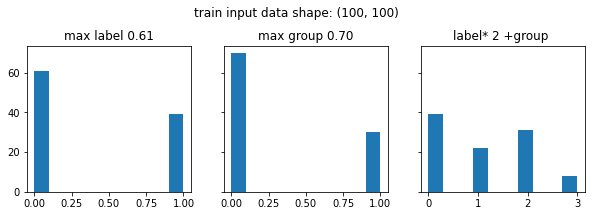

data loader 1
selected group is 0.0


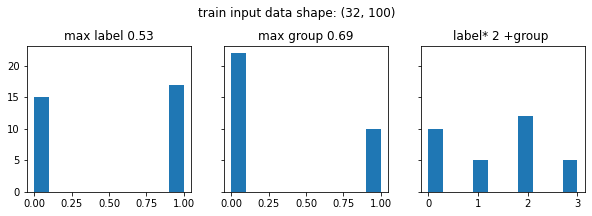

data loader 2
selected group is 0.0


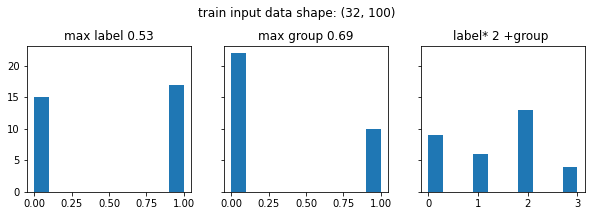

data loader 3
selected group is 1.0


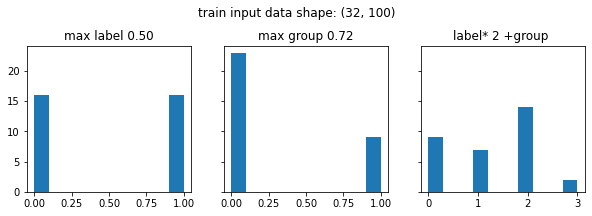

data loader 4
selected group is 0.0


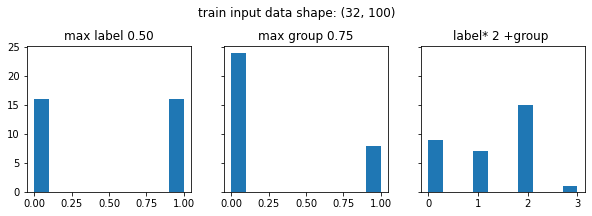

data loader 5
selected group is 0.0


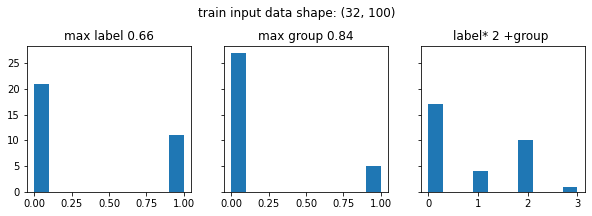

data loader 6
selected group is 0.0


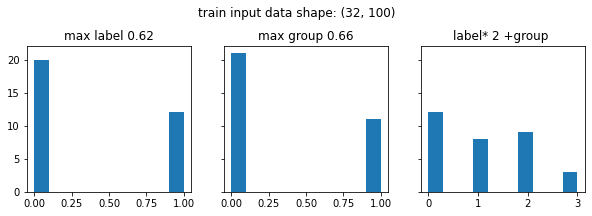

data loader 7
selected group is 0.0


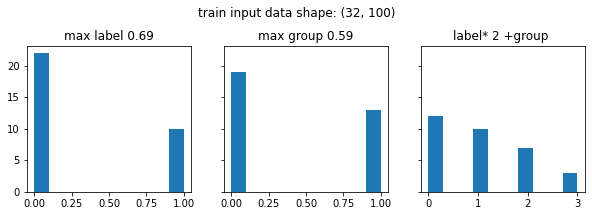

data loader 8
selected group is 1.0


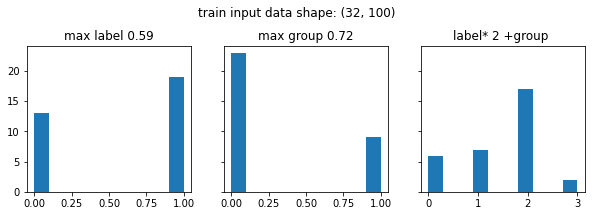

data loader 9
selected group is 0.0


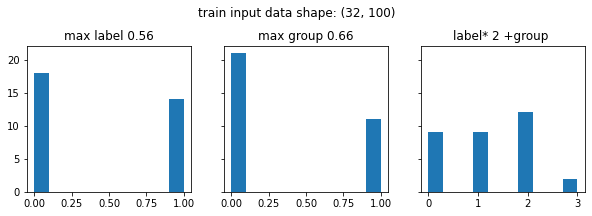

data loader 10
selected group is 0.0


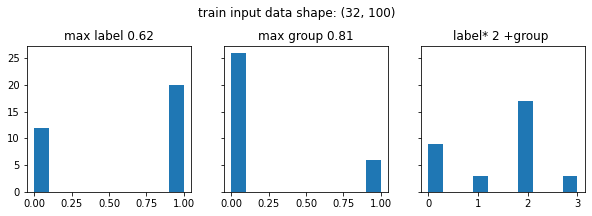

data loader 11
selected group is 0.0


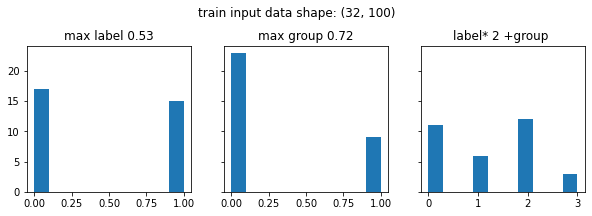

data loader 12
selected group is 0.0


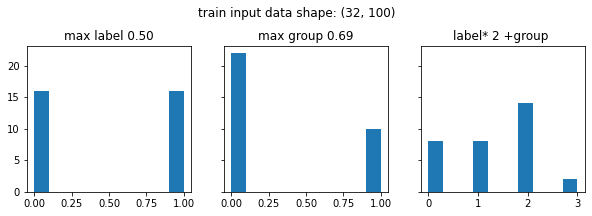

data loader 13
selected group is 0.0


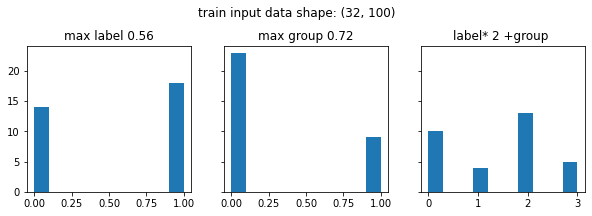

data loader 14
selected group is 0.0


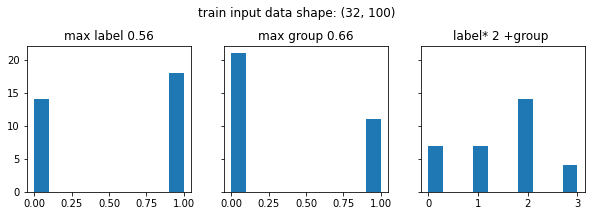

data loader 15
selected group is 0.0


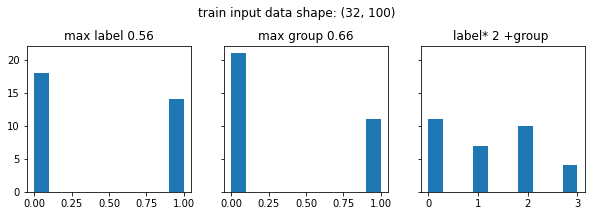

data loader 16
selected group is 0.0


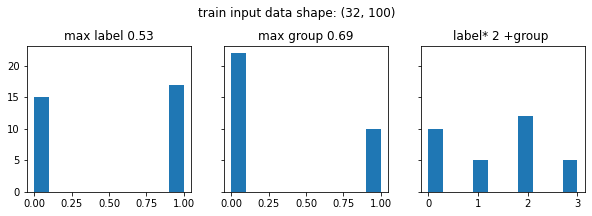

data loader 17
selected group is 0.0


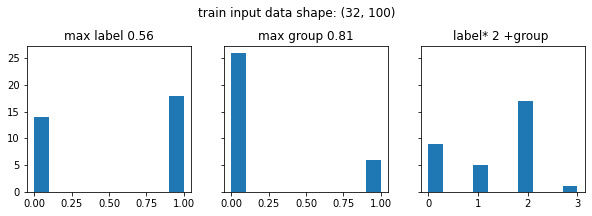

data loader 18
selected group is 0.0


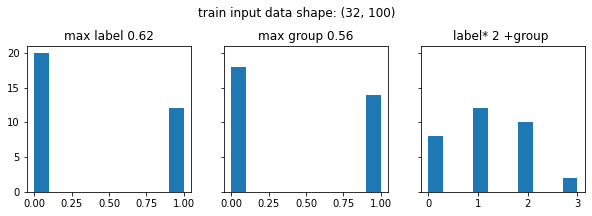

data loader 19
selected group is 0.0


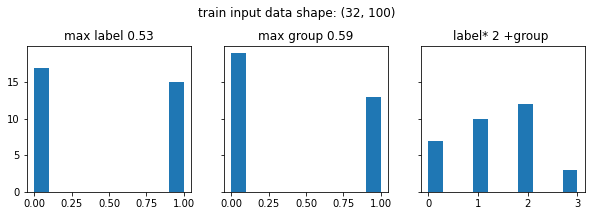

data loader 20
selected group is 0.0


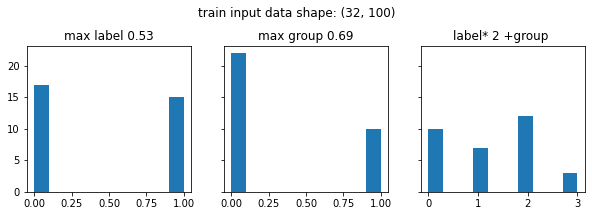

data loader 21
selected group is 0.0


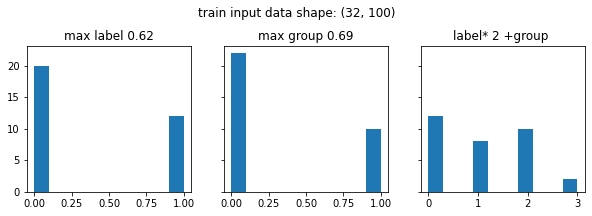

data loader 22
selected group is 0.0


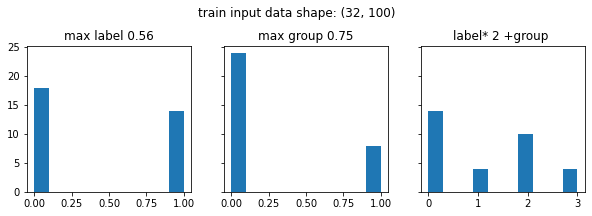

data loader 23
selected group is 0.0


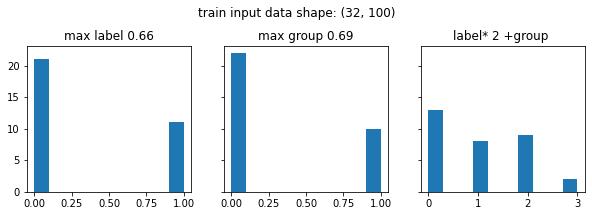

data loader 24
selected group is 0.0


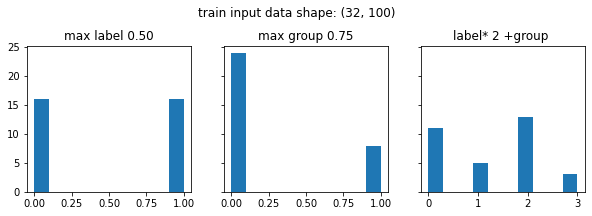

data loader 25
selected group is 0.0


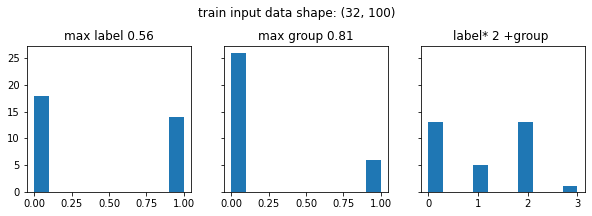

data loader 26
selected group is 0.0


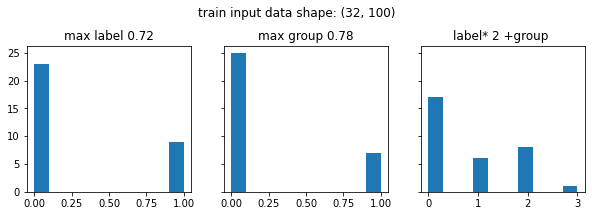

data loader 27
selected group is 0.0


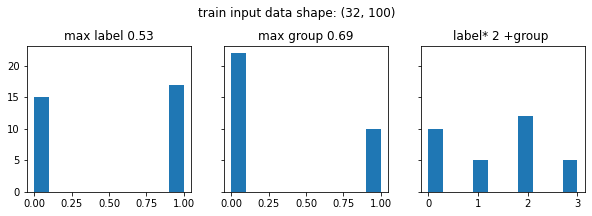

data loader 28
selected group is 0.0


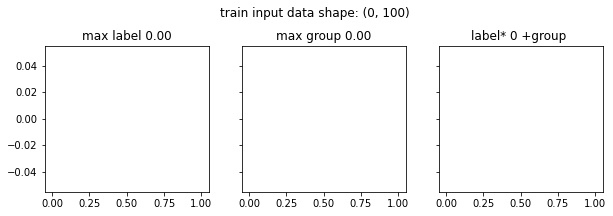

In [15]:
for i in range(len(dl_loaders)):
    print("data loader",i)
    if i>0:
        print("selected group is", gids[i-1])
    x,y,z = dl2nparray(dl_loaders[i])
    dataset_description(x,y,z)

data cumulative loader 0


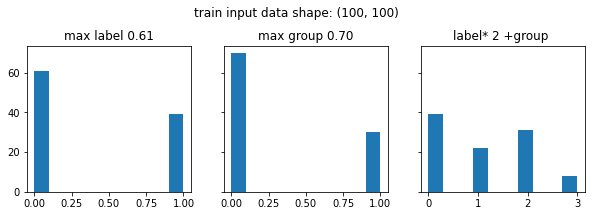

data cumulative loader 1


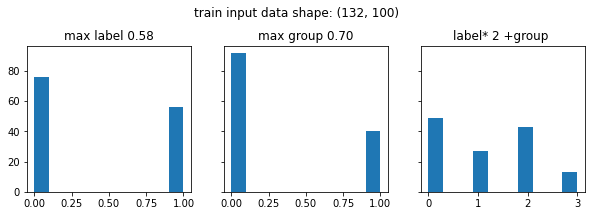

data cumulative loader 2


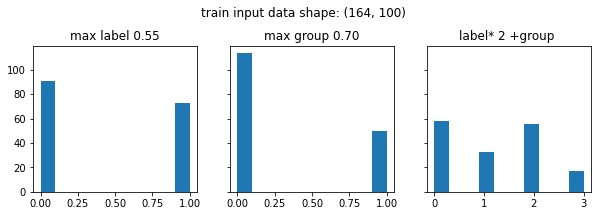

data cumulative loader 3


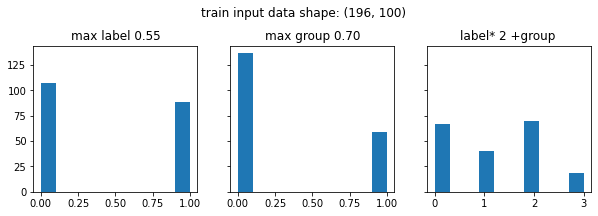

data cumulative loader 4


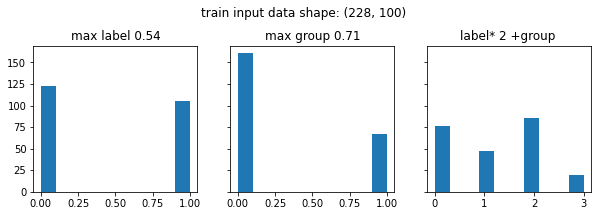

data cumulative loader 5


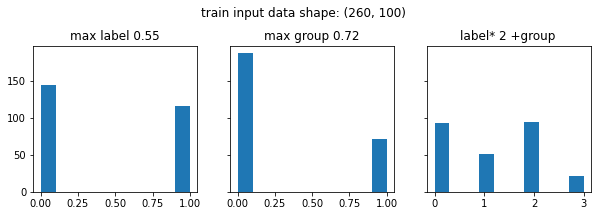

data cumulative loader 6


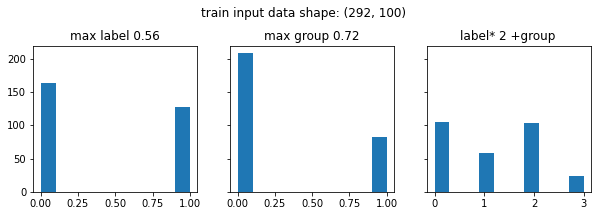

data cumulative loader 7


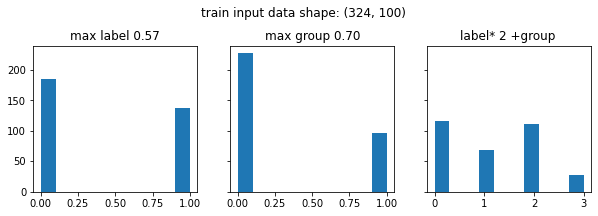

data cumulative loader 8


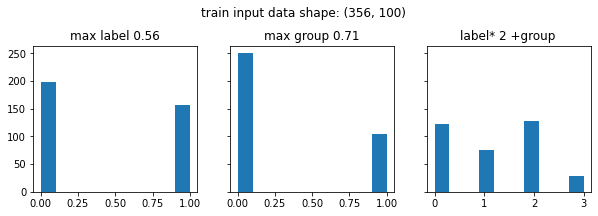

data cumulative loader 9


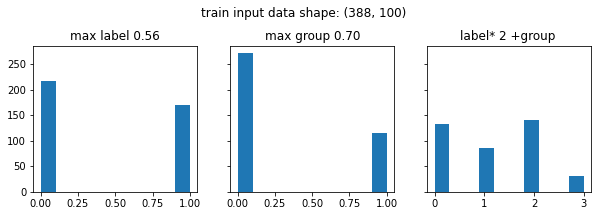

data cumulative loader 10


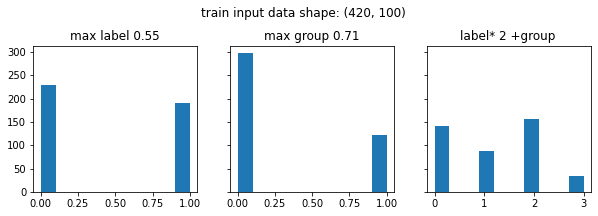

data cumulative loader 11


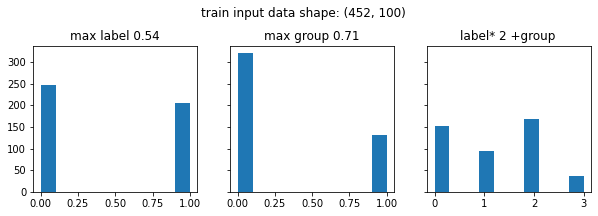

data cumulative loader 12


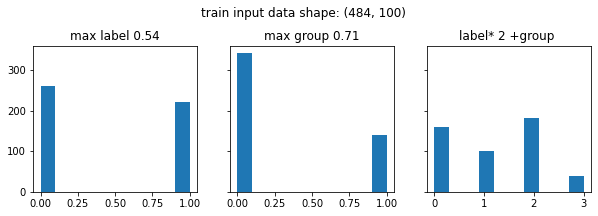

data cumulative loader 13


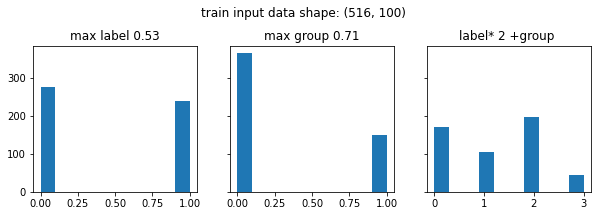

data cumulative loader 14


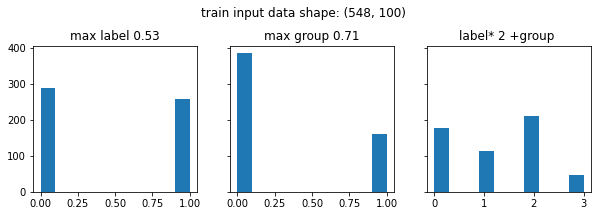

data cumulative loader 15


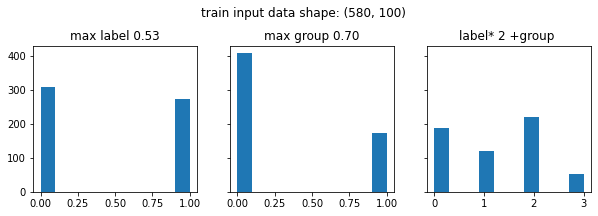

data cumulative loader 16


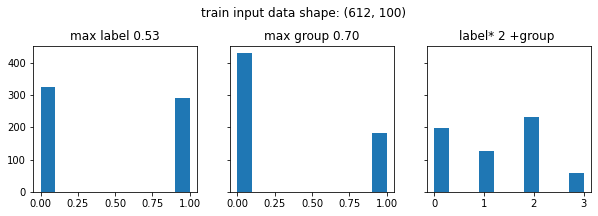

data cumulative loader 17


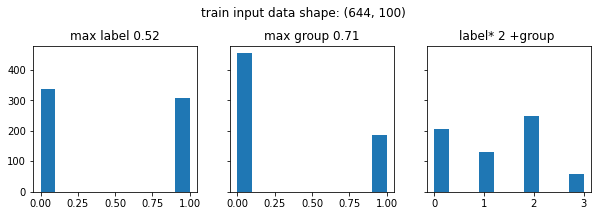

data cumulative loader 18


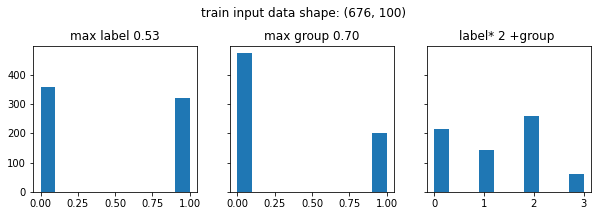

data cumulative loader 19


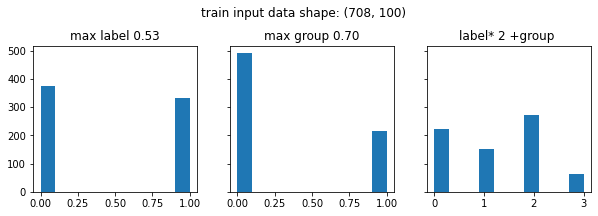

data cumulative loader 20


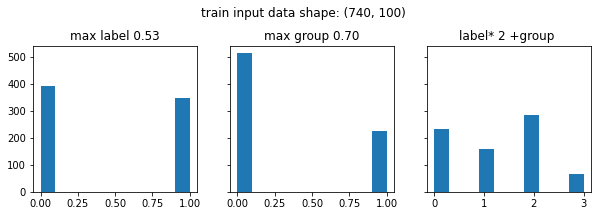

data cumulative loader 21


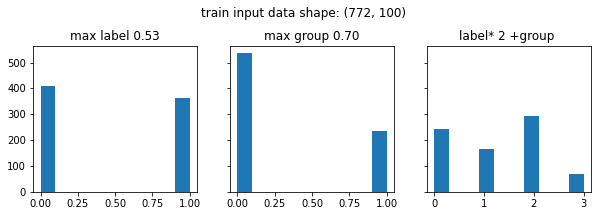

data cumulative loader 22


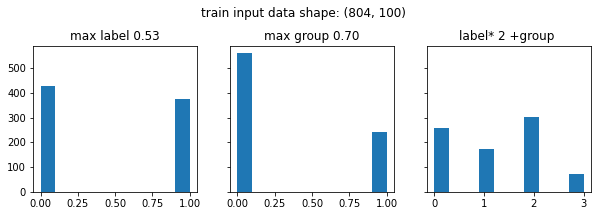

data cumulative loader 23


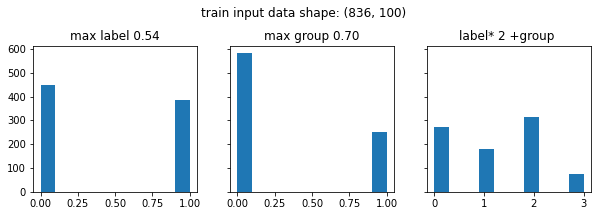

data cumulative loader 24


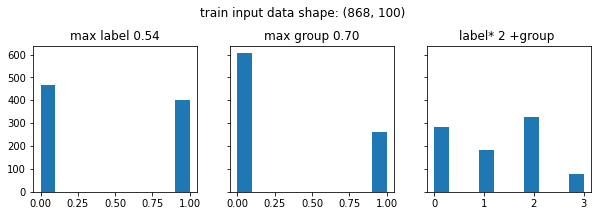

data cumulative loader 25


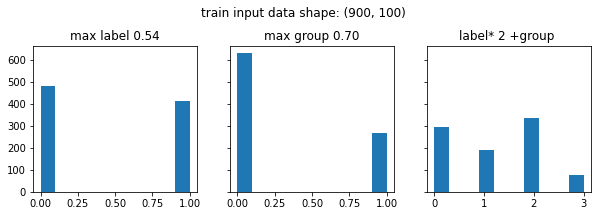

data cumulative loader 26


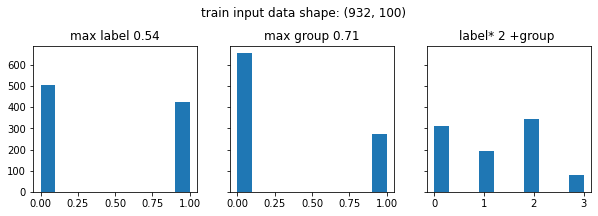

data cumulative loader 27


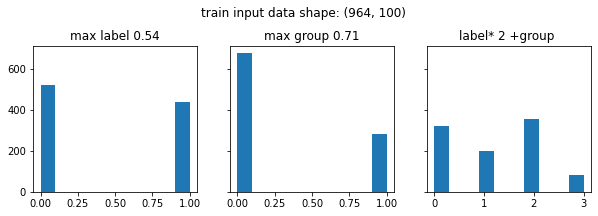

data cumulative loader 28


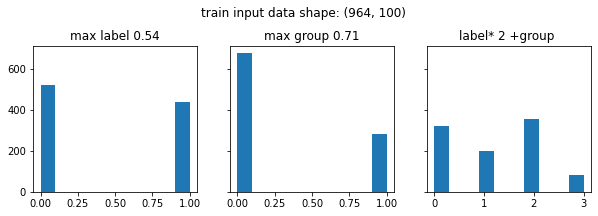

In [16]:
for i in range(len(dl_loaders)):
    print("data cumulative loader",i)
    x,y,z = dl2nparray(dl_cum_loaders[i])
    dataset_description(x,y,z)

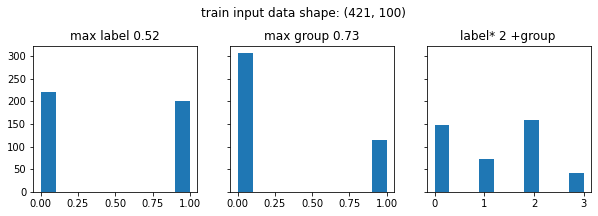

In [17]:
x,y,z = dl2nparray(test_loader)
dataset_description(x,y,z)

In [18]:
gids

[0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]